In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from tqdm import trange
from dataclasses import dataclass
import csv
from module import *

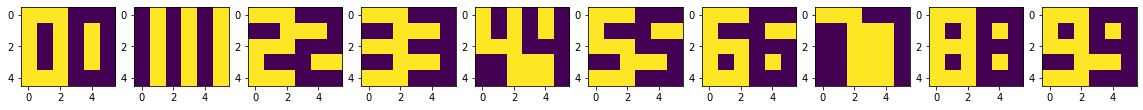

In [169]:
data_rows = {
    "e":  {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1},
    "r":  {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0},
    "c":  {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1},
    "cr": {0: 0, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0},
    "l":  {0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1},
    "lr": {0: 1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0},
    "lc": {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 1},
    "f":  {0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0},
    "off":{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
}
numbers = {
    0: "f lr lr lr f",
    1: "c c c c c",
    2: "f r f l f",
    3: "f r f r f",
    4: "lr lr f r r",
    5: "f l f r f",
    6: "f l f lr f",
    7: "f r r r r",
    8: "f lr f lr f",
    9: "f lr f r f",
}
empty = np.array([[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1]])

numbers_rows = {k: [data_rows[vv] for vv in v.split(" ")] for k, v in numbers.items()}

fig, axs = plt.subplots(1, 10, figsize=(20,20))
for ax, n in zip(axs, numbers_rows.values()):
    ax.imshow(pd.DataFrame(n).values)

In [3]:
def draw_network(net):
    import networkx as nx
    edges = []
    pos = {}
    n_in = {}
    for node, (_, priority, listen, cast) in net.nodes.iterrows():
        if listen is not None:
            try:
                iter(listen)
            except:
                listen = [listen]
            for l in listen:
                edges.append((l, node))
        if cast is not None:
            try:
                iter(cast)
            except:
                cast = [cast]
            for c in cast:
                edges.append((node, c))
        if priority not in n_in:
            n_in[priority] = 0
        pos[node] = (priority, n_in[priority])
        n_in[priority] += 0.5
    G = nx.DiGraph()
    G.add_edges_from(edges)
    plt.figure(figsize=(15,15))
    options = {
        "font_size": 12,
        "node_size": 300,
        "node_color": "white",
        "edgecolors": "blue",
        "linewidths": 2,
        "width": 2,
        "connectionstyle": 'arc3, rad = 0.3'
    }
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    nx.draw_networkx(G, pos, **options)
    plt.show()

In [196]:
params_rows = {
    "tau_leak": 1, 
    "tau_inhibitory": 5, 
    "tau_refractory": 5, 
    "tau_ltp": 1, 
    "thres": 750,
    "ainc": 30, 
    "adec": -15, 
    "wmax": 255, 
    "wmin": 1,
    "learning": False
}
weights_rows = np.array([
    [1, 1, 1, 255, 255, 255],
    [1, 1, 255, 255, 255, 1],
    [1, 255, 1, 255, 1, 255],
    [1, 255, 255, 255, 1, 1],
    [255, 1, 1, 1, 255, 255],
    [255, 1, 255, 1, 255, 1],
    [255, 255, 1, 1, 1, 255],
    [255, 255, 255, 1, 1, 1]
])
labels_rows = [
    "e",
    "r",
    "c",
    "cr",
    "l",
    "lr",
    "lc",
    "f"
]
params_digits = {
    "tau_leak": 50, 
    "tau_inhibitory": 30, 
    "tau_refractory": 50, 
    "tau_ltp": 1, 
    "thres": 700,
    "ainc": 30, 
    "adec": -15, 
    "wmax": 255, 
    "wmin": 1,
    "learning": False
}
weights_digits = np.array([
    [1, 1, 255, 1, 1, 1, 1, 1],
    [1, 255, 1, 1, 255, 1, 1, 255],
    [1, 1, 1, 1, 1,255, 1, 255]
])
labels_digits = [
    "one",
    "two",
    "zero"
]
net = Network(inputs_l=6, dt=1)
net.new_layer(8, weights=weights_rows, labels=labels_rows, **params_rows)
net.new_layer(3, weights=weights_digits, labels=labels_digits, **params_digits)
#net.make_recurrent()

In [197]:
net.nodes

,type,priority,listening,broadcasting,layer
0,input,0,None,None,-1
1,input,0,None,None,-1
2,input,0,None,None,-1
3,input,0,None,None,-1
4,input,0,None,None,-1
5,input,0,None,None,-1
6,ltp,1,0,None,0
7,ltp,1,1,None,0
8,ltp,1,2,None,0
9,ltp,1,3,None,0


In [74]:
net.weights

,weights,inhibited
12,"[1, 1, 1, 255, 255, 255]",-1
15,"[1, 1, 255, 255, 255, 1]",-1
18,"[1, 255, 1, 255, 1, 255]",-1
21,"[1, 255, 255, 255, 1, 1]",-1
24,"[255, 1, 1, 1, 255, 255]",-1
27,"[255, 1, 255, 1, 255, 1]",-1
30,"[255, 255, 1, 1, 1, 255]",-1
33,"[255, 255, 255, 1, 1, 1]",-1
44,"[1, 1, 255, 1, 1, 1, 1, 1]",-1
47,"[255, 1, 1, 1, 255, 1, 1, 255]",-1


In [75]:
net.labels_dict

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 13: 'e',
 16: 'r',
 19: 'c',
 22: 'cr',
 25: 'l',
 28: 'lr',
 31: 'lc',
 34: 'f',
 45: 'one',
 48: 'two',
 51: 'zero'}

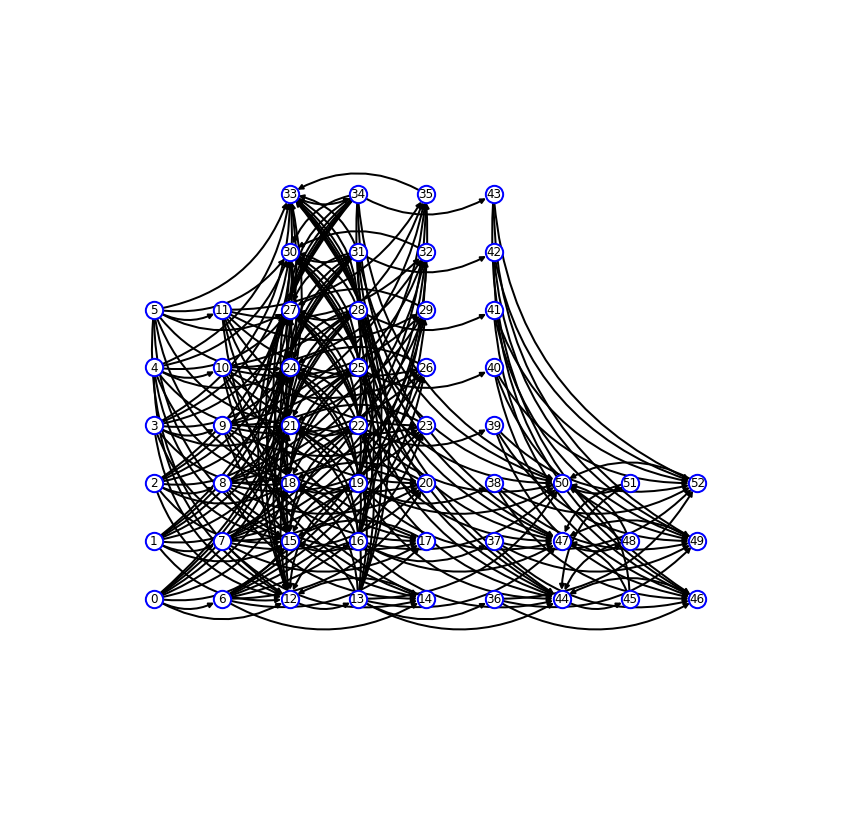

In [130]:
draw_network(net)

In [198]:
data = []
ns = [0, 1, 2]
for n in ns:
    #data.append(rows[np.random.randint(len(rows))])
    data += [x for x in numbers_rows[n] for _ in range(10)]
    for i in range(50):
        data.append(data_rows["off"])
print(ns)
out = net.feed_raw(data, "output.csv")

[0, 1, 2]


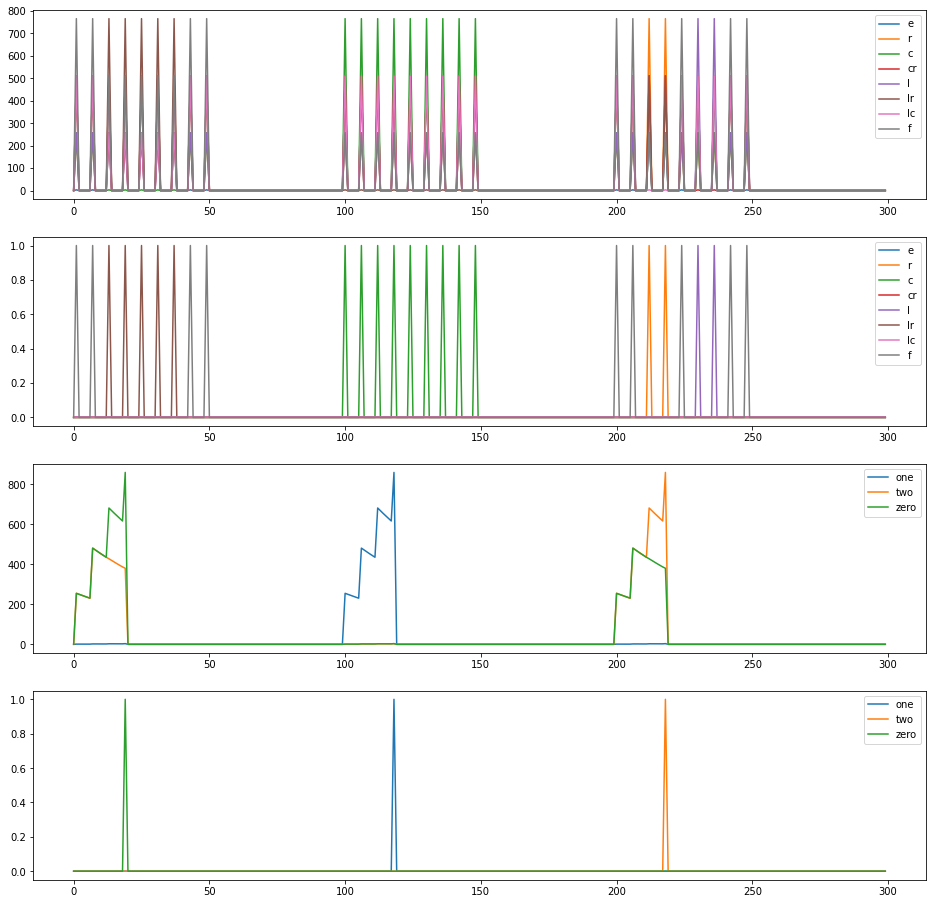

In [199]:
rows_pre = [12,15,18,21,24,27,30,33]
rows_post = [13,16,19,22,25,28,31,34]
digits_pre = [44,47,50]
digits_post = [45,48,51]

time = out.index.tolist()

fig, ax = plt.subplots(4,1,figsize=(16,16))

for n in rows_pre:
    ax[0].plot(time, out[n].values)
    ax[0].legend(labels_rows)
for n in rows_post:
    ax[1].plot(time, out[n].values)
    ax[1].legend(labels_rows)
for n in digits_pre:
    ax[2].plot(time, out[n].values)
    ax[2].legend(labels_digits)
for n in digits_post:
    ax[3].plot(time, out[n].values)
    ax[3].legend(labels_digits)

In [175]:
data = []
ns = np.random.randint(3, size=15)
for n in ns:
    #data.append(rows[np.random.randint(len(rows))])
    data += [x for x in numbers_rows[n] for _ in range(10)]
    for i in range(150):
        data.append(data_rows["off"])
print(ns)
out = net.feed_raw(data, "output.csv")

[2 0 1 1 2 2 1 1 1 1 0 2 0 0 0]


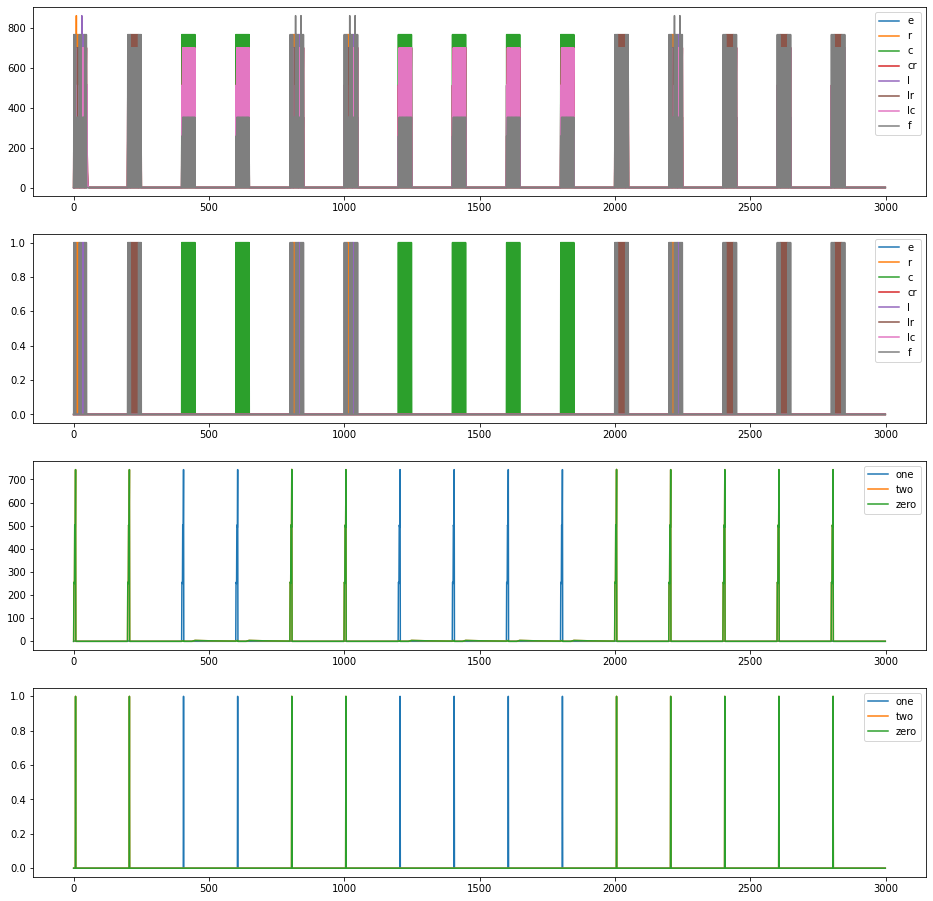

In [176]:
rows_pre = [12,15,18,21,24,27,30,33]
rows_post = [13,16,19,22,25,28,31,34]
digits_pre = [44,47,50]
digits_post = [45,48,51]

time = out.index.tolist()

fig, ax = plt.subplots(4,1,figsize=(16,16))

for n in rows_pre:
    ax[0].plot(time, out[n].values)
    ax[0].legend(labels_rows)
for n in rows_post:
    ax[1].plot(time, out[n].values)
    ax[1].legend(labels_rows)
for n in digits_pre:
    ax[2].plot(time, out[n].values)
    ax[2].legend(labels_digits)
for n in digits_post:
    ax[3].plot(time, out[n].values)
    ax[3].legend(labels_digits)

In [84]:
net.weights

,weights,inhibited
12,"[1, 1, 1, 255, 255, 255]",597
15,"[1, 1, 255, 255, 255, 1]",612
18,"[1, 255, 1, 255, 1, 255]",597
21,"[1, 255, 255, 255, 1, 1]",597
24,"[255, 1, 1, 1, 255, 255]",610
27,"[255, 1, 255, 1, 255, 1]",597
30,"[255, 255, 1, 1, 1, 255]",597
33,"[255, 255, 255, 1, 1, 1]",603
44,"[1, 1, 255, 1, 1, 1, 1, 1]",0
47,"[255, 1, 1, 1, 255, 1, 1, 255]",0


In [96]:
net.leak

0.8187307530779818

In [98]:
np.exp(-1/100)

0.9900498337491681